# Confronto velocità con e senza DRS

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
import statistics

ff1.Cache.enable_cache('2023Australia') 
fp = ff1.get_session(2023, 'Australia', 'R')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

328.8888888888889
312.77777777777777


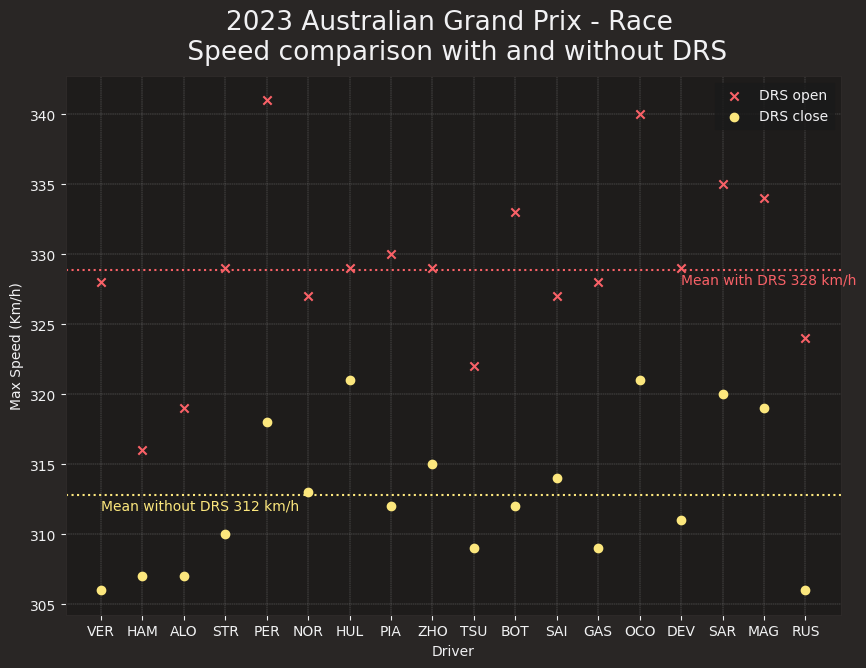

In [31]:
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

max_speed_dict_drs = dict.fromkeys(drivers)
max_speed_dict_no_drs = dict.fromkeys(drivers)
for driver in drivers:
    if not driver == "LEC":
        if not driver == "ALB":
                    #df_drs_off, df_drs_on = [x for _, x in fp_laps.pick_driver(driver).get_car_data().groupby(fp_laps.pick_driver(driver).get_car_data()['DRS'] % 2 == 0)]
                    df_drs_on = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'] == 2) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 4) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 6) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 10) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 12)|
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 14)]

                    df_drs_off = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'] == 0) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 1) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 3)|
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 5) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 7)|
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 9)|
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 11) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 13) ]
                    max_speed_dict_drs[driver] = max(df_drs_on['Speed'])
                    max_speed_dict_no_drs[driver] = max(df_drs_off['Speed'])

del max_speed_dict_drs['LEC']
del max_speed_dict_no_drs['LEC']
del max_speed_dict_drs['ALB']
del max_speed_dict_no_drs['ALB']
print(statistics.mean(list(max_speed_dict_drs.values())))
print(statistics.mean(list(max_speed_dict_no_drs.values())))
ff1.plotting.setup_mpl()
plt.figure(figsize=(10, 7))
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \n Speed comparison with and without DRS")
plt.ylabel("Max Speed (Km/h)")
plt.xlabel("Driver")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.scatter(max_speed_dict_drs.keys(), max_speed_dict_drs.values(), color='#F96167', marker='x', label="DRS open")
plt.axhline(y=(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs)), color='#F96167', linestyle=':')
plt.annotate("Mean with DRS " + f"{int(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))} km/h", xy=("DEV", (sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))-1), color='#F96167')

plt.scatter(max_speed_dict_no_drs.keys(), max_speed_dict_no_drs.values(), color='#FCE77D', marker='o', label="DRS close")
plt.axhline(y=(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs)), color='#FCE77D', linestyle=':')
plt.annotate("Mean without DRS " + f"{int(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))} km/h", xy=("VER", (sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))-1), color='#FCE77D')
plt.legend()

# Diversa interpretazione dei dati del DRS
### < 10 per i dati con DRS chiuso
### > 10 per i dati con DRS aperto

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
import statistics

ff1.Cache.enable_cache('2023Australia') 
fp = ff1.get_session(2023, 'Australia', 'R')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

C:\Users\ricca\AppData\Local\Temp\ipykernel_19356\2244081791.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_drs_off = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'].between(0, 10, inclusive = True))]
C:\Users\ricca\AppData\Local\Temp\ipykernel_19356\2244081791.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_drs_on = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'].between(11, 14, inclusive = True))]


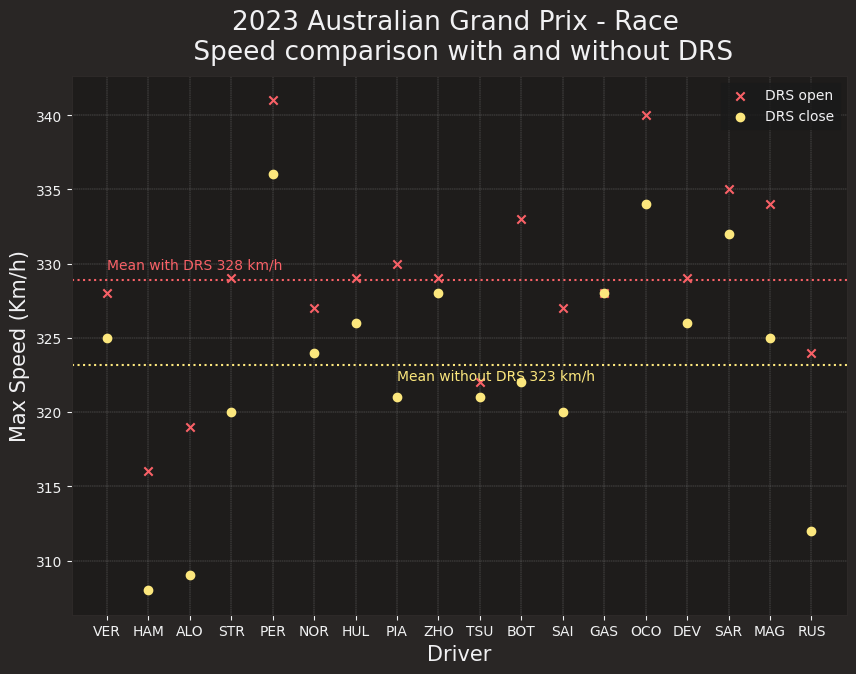

In [3]:
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

max_speed_dict_drs = dict.fromkeys(drivers)
max_speed_dict_no_drs = dict.fromkeys(drivers)

for driver in drivers:
    if not driver == "LEC":
      if not driver == "ALB":
        df_drs_off = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'].between(0, 10, inclusive = True))]
        df_drs_on = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'].between(11, 14, inclusive = True))]
        
        max_speed_dict_drs[driver] = max(df_drs_on['Speed'])
        max_speed_dict_no_drs[driver] = max(df_drs_off['Speed'])

del max_speed_dict_drs['LEC']
del max_speed_dict_no_drs['LEC']
del max_speed_dict_drs['ALB']
del max_speed_dict_no_drs['ALB']

ff1.plotting.setup_mpl()
plt.figure(figsize=(10, 7))
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \n Speed comparison with and without DRS")
plt.ylabel("Max Speed (Km/h)", fontsize=15)
plt.xlabel("Driver", fontsize = 15)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.scatter(max_speed_dict_drs.keys(), max_speed_dict_drs.values(), color='#F96167', marker='x', label="DRS open")
plt.axhline(y=(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs)), color='#F96167', linestyle=':')
plt.annotate("Mean with DRS " + f"{int(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))} km/h", xy=("VER", (sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))+0.8), color='#F96167')
plt.scatter(max_speed_dict_no_drs.keys(), max_speed_dict_no_drs.values(), color='#FCE77D', marker='o', label="DRS close")
plt.axhline(y=(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs)), color='#FCE77D', linestyle=':')
plt.annotate("Mean without DRS " + f"{int(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))} km/h", xy=("PIA", (sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))-1), color='#FCE77D')
plt.legend()